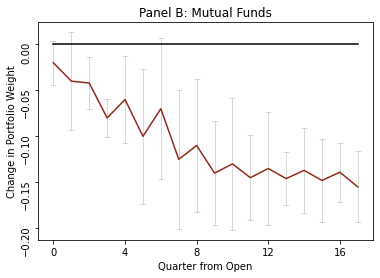

In [18]:
#task1 绘制带误差线的折线图

import matplotlib.pyplot as plt
import numpy as np

#使用arrange方法生成x轴坐标
x_1 = np.arange(0, 18)

y_1 = np.array([-0.02,-0.04,-0.042,-0.08,-0.06,-0.1,
                -0.07,-0.125,-0.11,-0.14,-0.13,-0.145,
                -0.135,-0.146,-0.137,-0.148,-0.139,-0.155])

#生成用来画y=0的黑线的y坐标，注意如何表示18个0组成的数组
y_2 = np.array([0]*18)

#生成误差，误差使用随机生成的方法，随机抽取18个，*2是为了画的更明显，不用关心
err_1 = 2* np.random.choice(np.arange(0.01, 0.04, 0.0001), 18)

#根据x，y绘制折线
plt.plot(x_1,y_1,color="#902B19") #小技巧，可以通过ppt的取色工具，从其他作者的图中获得你想要画出来的颜色的代码
plt.plot(x_1,y_2,color="black")

#用errorbar方法绘制误差线，可以设置alpha透明度，线宽linewidth等指标
plt.errorbar(x=x_1, y=y_1, yerr=err_1, color="grey", capsize=3, alpha = 0.3, linewidth=1, 
             linestyle="None",mfc="black", mec="black")

#使用plt.xtick()方法，指定在哪几个刻度上（用x_ticks说明)标注哪几个字符(用x_labels说明)
x_ticks = (0, 4, 8, 12, 16)
x_labels = ("0", "4", "8", "12", "16")
plt.xticks(x_ticks, x_labels, rotation=0)

#用rotation参数指定lable旋转角度，注意，和x轴不同，这里没有指定ticks和labels，程序会自动指定
plt.yticks(rotation=90)

#指定x，y的坐标轴label
plt.xlabel("Quarter from Open")
plt.ylabel("Change in Portfolio Weight")

#指定标题，展示
plt.title('Panel B: Mutual Funds')
plt.show()

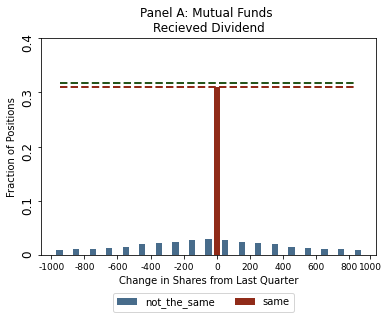

In [24]:
#task2 绘制两组柱状图

import numpy as np
import matplotlib.pyplot as plt


#生成两组数据
not_the_same = np.array([0.01, 0.011, 0.012, 0.013, 0.015,
                         0.02, 0.022, 0.025, 0.028, 0.03, 
                         0.028, 0.025, 0.022, 0.02, 0.015, 
                         0.013, 0.012, 0.011, 0.01])
same = np.array([0.31])

#使用plt.bar()生成柱状图，几个参数分别为：放置柱的坐标，柱的高度，宽度，颜色，标签，柱体和坐标的相对位置
a = plt.bar(list(np.arange(len(not_the_same))*4), not_the_same, width = 1.5, 
                 color='#486C8B', label='not_the_same', align='center')
b = plt.bar(38, same, width = 1.5, color='#902B19', label='same', align='center')

#设置xy轴该显示怎样的刻度，同Task1
plt.xlabel('Change in Shares from Last Quarter')
plt.xticks([-2,6,14,22,30,38,46,54,62,70,75], [str(ele) for ele in np.arange(-1000,1100,200)], 
           rotation=0, fontsize=9)

plt.ylabel('Fraction of Positions')
plt.yticks([0,0.1,0.2,0.3,0.4], [0,0.1,0.2,0.3,0.4], rotation=90, fontsize=12)

#设置图例，我们使用bbox_to_anchor参数来指定图例和主图的相对位置
plt.legend(ncol=3, loc=0, bbox_to_anchor=(0.77,-0.15))

x = np.linspace(0,71,72)
y1 = np.array([0.31]*72)
y2 = np.array([0.317]*72)

#设置y轴的显示限度
plt.ylim(0,0.4)

#绘制虚线，多加入了--来表明，也可以实现原点线等效果
plt.plot(x, y1, '--', color='#902B19', linewidth=2)
plt.plot(x, y2, '--', color='#25551A', linewidth=2)

plt.title('Panel A: Mutual Funds \nRecieved Dividend')
plt.show()

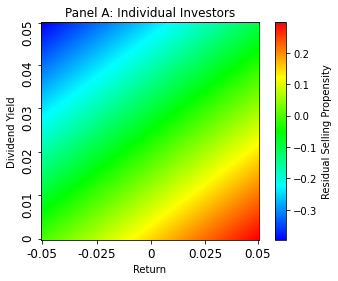

In [26]:
#task3 绘制两组柱状图
import numpy as np
import numpy.random

import matplotlib as mpl
import matplotlib.pyplot as plt

#LinearSegmentedColormap来实现colorbar功能
from matplotlib.colors import LinearSegmentedColormap

#生成我们想要的图像对应的值，heatmap[i,j]的值是x，y的二元函数
x = np.random.randn(100)
y = np.random.randn(100)

heatmap = np.random.rand(100,100)
for i in range(100):
    for j in range(100):
        heatmap[i,j] =  0.001*(3*i-4*j)
        
#使用三原色，rgb来生成cdict，告知程序该如何设置渐变的colorbar
#red后的五组数表示我们在colorbar上设置五个关键节点，系统根据这五个关键节点的rgb色值来插值计算该如何进行渐变
#每组数的第一个表示在colorbar位置的百分比，比如0.5表示colorbar一半的位置
#每组的第2-3个数，以red的(0.25, 0.0, 0.0)(0.5, 0.0, 0.0)这两行为例，这表明从0.25-0.5的位置中，红色的值从(0.25, 0.0, 0.0)
#的第三个数0.0，到(0.5, 0.0, 0.0)的第二个数0.0之间进行插值

#具体可参考：https://blog.csdn.net/sinat_32570141/article/details/105226330

cdict = {'red': ((0.0, 0.0, 0.0),   # no red at 0.0
                 (0.25, 0.0, 0.0),  # no red at 0.25
                 (0.5, 0.0, 0.0),   # no red at 0.5
                 (0.75, 1.0, 1.0),  # red at 0.75
                 (1.0, 1.0, 1.0)),  # red at 1.0
        'green': ((0.0, 0.0, 0.0),  
                 (0.25, 1.0, 1.0),
                 (0.5, 1.0, 1.0),   
                 (0.75, 1.0, 1.0),
                 (1.0, 0.0, 0.0)),  
        'blue': ((0.0, 1.0, 1.0),   
                 (0.25, 1.0, 1.0),
                 (0.5, 0.0, 0.0),  
                 (0.75, 0.0, 0.0),
                 (1.0, 0.0, 0.0))} 


plt.xlabel('Return')
plt.xticks([0, 25, 50, 75, 99], ['-0.05', '-0.025', '0', '0.025', '0.05'], rotation=0, fontsize=12)

plt.ylabel('Dividend Yield')
plt.yticks([0, 20, 40, 60, 80, 99], ['0', '0.01', '0.02','0.03', '0.04', '0.05'], rotation=90, fontsize=12)

cmap = LinearSegmentedColormap('Rd_Bl_Rd', cdict, 256)

plt.title("Panel A: Individual Investors")
plt.imshow(heatmap.T,origin='lower',cmap=cmap)
plt.colorbar().set_label('Residual Selling Propensity')
plt.show()